In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import pandas as pd

In [2]:

df = pd.DataFrame({
    "soil_moisture": [0.10, 0.15, 0.20, 0.25, 0.40, 0.60, 0.35, 0.18,
                      0.45, 0.05, 0.80, 0.27, 0.55, 0.70, 0.12, 0.30],
    "temperature_c": [34, 30, 26, 22, 28, 30, 19, 22,
                      35, 24, 33, 33, 21, 25, 20, 29],
    "sunlight_hours": [9, 8, 7, 4, 8, 10, 3, 10,
                       12, 5, 9, 11, 2, 6, 1, 9],
    "needs_water": [1, 1, 1, 0, 0, 0, 0, 1,
                    0, 1, 0, 1, 0, 0, 1, 1]})

In [3]:
df

,soil_moisture,temperature_c,sunlight_hours,needs_water
0,0.10,34,9,1
1,0.15,30,8,1
2,0.20,26,7,1
3,0.25,22,4,0
4,0.40,28,8,0
5,0.60,30,10,0
6,0.35,19,3,0
7,0.18,22,10,1
8,0.45,35,12,0
9,0.05,24,5,1


In [4]:
X = df[['soil_moisture', 'temperature_c', 'sunlight_hours']]
y = df['needs_water']

In [5]:
from sklearn.preprocessing import minmax_scale
X_scaled = minmax_scale(
    df[["soil_moisture", "temperature_c", "sunlight_hours"]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y)

In [7]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu', input_shape=(3,)),
    layers.Dense(1,activation='sigmoid')])

d:\Machinelearning\myenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss = "binary_crossentropy",metrics=['accuracy'])

In [9]:
history_full = model.fit(X_train, y_train, epochs=100, batch_size=6,
                         validation_data=(X_test, y_test))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 638ms/step - accuracy: 0.5000 - loss: 0.7338 - val_accuracy: 0.5000 - val_loss: 0.7542
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5000 - loss: 0.7327 - val_accuracy: 0.5000 - val_loss: 0.7533
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5000 - loss: 0.7309 - val_accuracy: 0.5000 - val_loss: 0.7524
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 0.7299 - val_accuracy: 0.5000 - val_loss: 0.7514
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5000 - loss: 0.7286 - val_accuracy: 0.5000 - val_loss: 0.7505
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.5000 - loss: 0.7276 - val_accuracy: 0.5000 - val_loss: 0.7497
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 0.7261 - val_accuracy: 0.5000 - val_loss: 0.7488
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5000 - loss: 0.7253 - val_accuracy: 0.5000 - v

In [10]:
history_minibatch = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step - accuracy: 0.6667 - loss: 0.6810
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6667 - loss: 0.6809
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.6667 - loss: 0.6808
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6667 - loss: 0.6807
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7500 - loss: 0.6806
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7500 - loss: 0.6805
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7500 - loss: 0.6804
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7500 - loss: 0.6803
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7500 - loss: 0.6801
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7500 - loss: 0.6800
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7500 - loss: 0.6799
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0

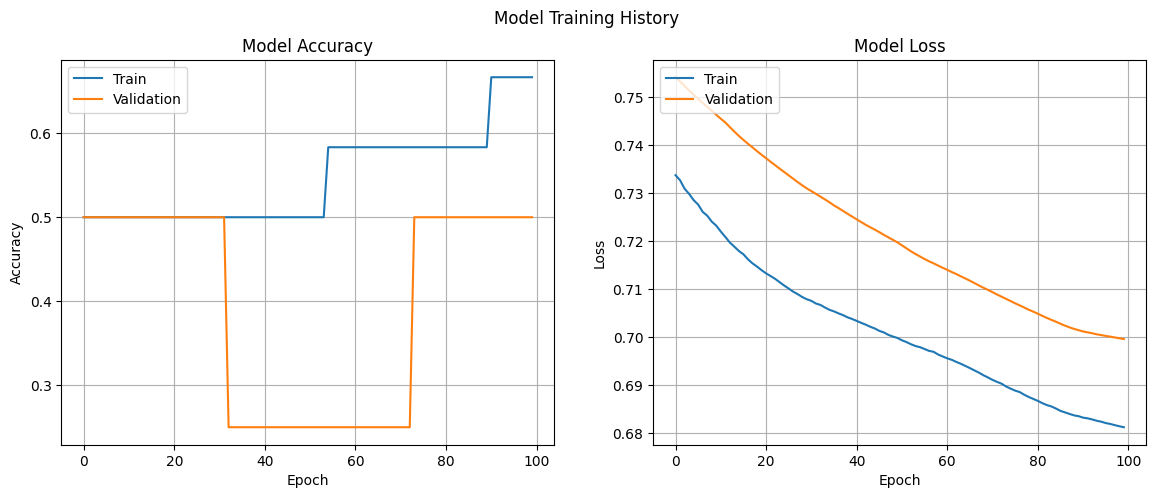

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# Plot training & validation accuracy values
ax1.plot(history_full.history['accuracy'])
ax1.plot(history_full.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax1.grid(True)


# Plot training & validation loss values
ax2.plot(history_full.history['loss'])
ax2.plot(history_full.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')
ax2.grid(True)

plt.suptitle('Model Training History')
plt.show()